# Machine Learning -1 "Regresión"
Ejemplo de: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

## Importamos las librerías necesarias

In [2]:

#Todo el machine learning pero no deep learning se hace con scikit-learn (shallow algorithms (regresores, arboles de decision, etc..))
#Hay que tener cuidado con los indices 

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Cargamos los datos y los partimos en entrenamiento y testeo

Los datos tinene esta forma:
X:
0. age age in years
1. sex
2. bmi body mass index
3. bp average blood pressure
4. s1 tc, total serum cholesterol
5. s2 ldl, low-density lipoproteins
6. s3 hdl, high-density lipoproteins
7. s4 tch, total cholesterol / HDL
8. s5 ltg, possibly log of serum triglycerides level
9. s6 glu, blood sugar level
y:
- a quantitative measure of disease progression one year after baseline

In [7]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(f"diabetes_X.shape: {diabetes_X.shape}")
print(f"diabetes_y.shape: {diabetes_y.shape}")

# dataset description
labels = ["Edad", "sex", "bmi", "Presión", "Colesterol Total", "Colesterol Malo", "Colesterol Bueno", "tch", "ltg", "glu"]
feature = 2
print(f"Vamos a predecir usando la característica {labels[feature]}")

diabetes_X_original = diabetes_X
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, feature]

# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.2, random_state=42) #corta en 2 y shufflea cual va para cual. cual para test y cual para train. en este caso 20% para train (0.2)

print(diabetes_X_train)
print(f"diabetes_X_train.shape: {diabetes_X_train.shape}")
print(f"diabetes_X_test.shape: {diabetes_X_test.shape}")
print(f'diabetes_y_train.shape = {diabetes_y_train.shape}')

diabetes_X.shape: (442, 10)
diabetes_y.shape: (442,)
Vamos a predecir usando la característica bmi
[[ 0.01211685]
 [-0.01806189]
 [ 0.04984027]
 [-0.03530688]
 [-0.06548562]
 [-0.03961813]
 [ 0.02073935]
 [ 0.06924089]
 [ 0.03798434]
 [-0.01698407]
 [-0.06871905]
 [ 0.01966154]
 [-0.05794093]
 [ 0.10480869]
 [-0.07949718]
 [ 0.02073935]
 [-0.04069594]
 [-0.03530688]
 [-0.04392938]
 [ 0.01966154]
 [ 0.02612841]
 [-0.03638469]
 [ 0.04229559]
 [-0.05039625]
 [ 0.05522933]
 [ 0.01427248]
 [-0.01159501]
 [-0.0105172 ]
 [-0.00943939]
 [-0.00405033]
 [ 0.01535029]
 [ 0.02397278]
 [-0.0374625 ]
 [-0.03207344]
 [ 0.01858372]
 [-0.01590626]
 [-0.00620595]
 [ 0.00888341]
 [-0.0374625 ]
 [-0.00943939]
 [-0.07734155]
 [-0.00189471]
 [-0.04500719]
 [ 0.04552903]
 [ 0.03259528]
 [ 0.08540807]
 [-0.0105172 ]
 [ 0.11019775]
 [-0.00620595]
 [ 0.00133873]
 [ 0.114509  ]
 [-0.04069594]
 [ 0.01750591]
 [ 0.05954058]
 [-0.046085  ]
 [ 0.04768465]
 [ 0.00564998]
 [-0.03099563]
 [ 0.05415152]
 [-0.00512814]
 

diabetes_x.shape: 10 features (columnas) y 442 personas (filas) 

dyabetes_y.shape: 1 feature (columna) con 442 personas (filas). Es el label.


## Creamos el modelo de regresión lineal y lo entrenamos

In [4]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train) #encuentra la mejor linea que esta a distancias cuadraticas


LinearRegression()

## predecimos los valores de testeo y graficamos los resultados

Mean squared training error: 3854.11
Coefficients: 
 [998.57768914]
Mean squared testing error: 4061.83
Coefficient of determination: 0.23


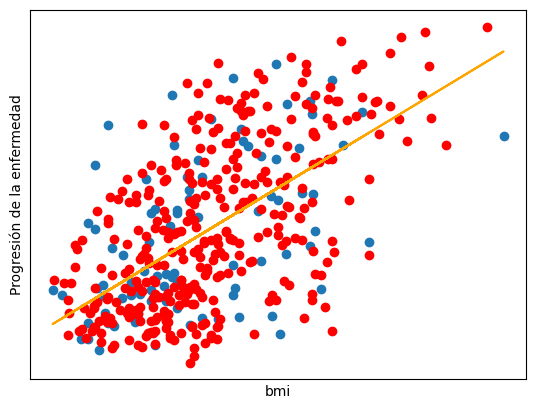

In [5]:
diabetes_y_pred = regr.predict(diabetes_X_train)
print("Mean squared training error: %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred))


# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_) 
# The mean squared error
print("Mean squared testing error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred, color="orange")
plt.scatter(diabetes_X_train, diabetes_y_train, color="red")
plt.xticks(())
plt.yticks(())

plt.xlabel(labels[feature])
plt.ylabel("Progresión de la enfermedad")

plt.show()

                                    train               validation

Regresion Lineal 1 dimension:     3850                      4000                tienen mucha varianza los puntos, hay alguna tendencia claramente pero hay mucha varianza asique por ahi no predice tan bien. necesitmaos minimizar esos dos numeros obtenidos.

Regresion Lineal 10 dimensiones    2800                     2900            mejora bastante con todos los features

Tree (profunidad 3)                2900                     3550              Estoy sobreajustando los datos, me estoy como acordando los datos de memoria, y no es lo que yo quiero

Tree (profundidad 5)               2000                     3920                mejora el training pero empeora en validation, se acuerda todavia mas los puntos

TTTT (Random forest)               2535                     2812                combinando arboles mejora el train y la validation

In [6]:
# using all features
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X_original, diabetes_y, test_size=0.2, random_state=42)

print(diabetes_X_train)
print(f"diabetes_X_train.shape: {diabetes_X_train.shape}")
print(f"diabetes_y_train.shape: {diabetes_y_train.shape}")

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_train)
print("Mean squared training error: %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred))


# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared testing error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


[[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]
diabetes_X_train.shape: (353, 10)
diabetes_y_train.shape: (353,)
Mean squared training error: 2868.55
Coefficients: 
 [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Mean squared testing error: 2900.19
Coefficient of determination: 0.45


In [7]:
# now with decision tree
from sklearn.tree import DecisionTreeRegressor #DecisionTreeClassifier si queremos un arbol para clasificacion en vez de regresion

regr = DecisionTreeRegressor(max_depth=3)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_train)
print("Mean squared training error: %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred))


# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The mean squared error
print("Mean squared testing error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared training error: 2935.04
Mean squared testing error: 3552.70
Coefficient of determination: 0.33


Mean squared training error: 2535.18
Mean squared testing error: 2812.77
Coefficient of determination: 0.47


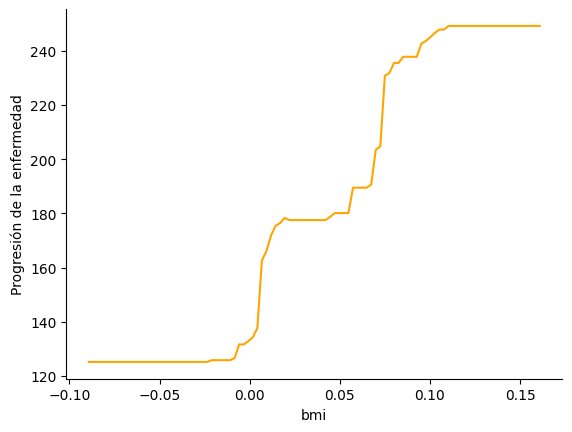

In [9]:
# now with random forest
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_train)
print("Mean squared training error: %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred))


# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The mean squared error
print("Mean squared testing error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Lets plot a slice of the shape of the random forest in the y x plane
x = np.linspace(min(diabetes_X_train[:, feature]), max(diabetes_X_train[:, feature]), 100)
# use mean values for the other features
X = np.zeros((100, 10))
for i in range(10):
    if i != feature:
        X[:, i] = np.mean(diabetes_X_train[:, i])
    else:
        X[:, feature] = x
y = regr.predict(X)

#plt.scatter(diabetes_X_train[:, feature], diabetes_y_train, marker=".",color="black")
#plt.scatter(diabetes_X_test[:, feature], diabetes_y_test, marker="x")
plt.plot(x, y, color="orange")
plt.xlabel(labels[feature])
plt.ylabel("Progresión de la enfermedad")
plt.gca().spines[['right', 'top']].set_visible(False)

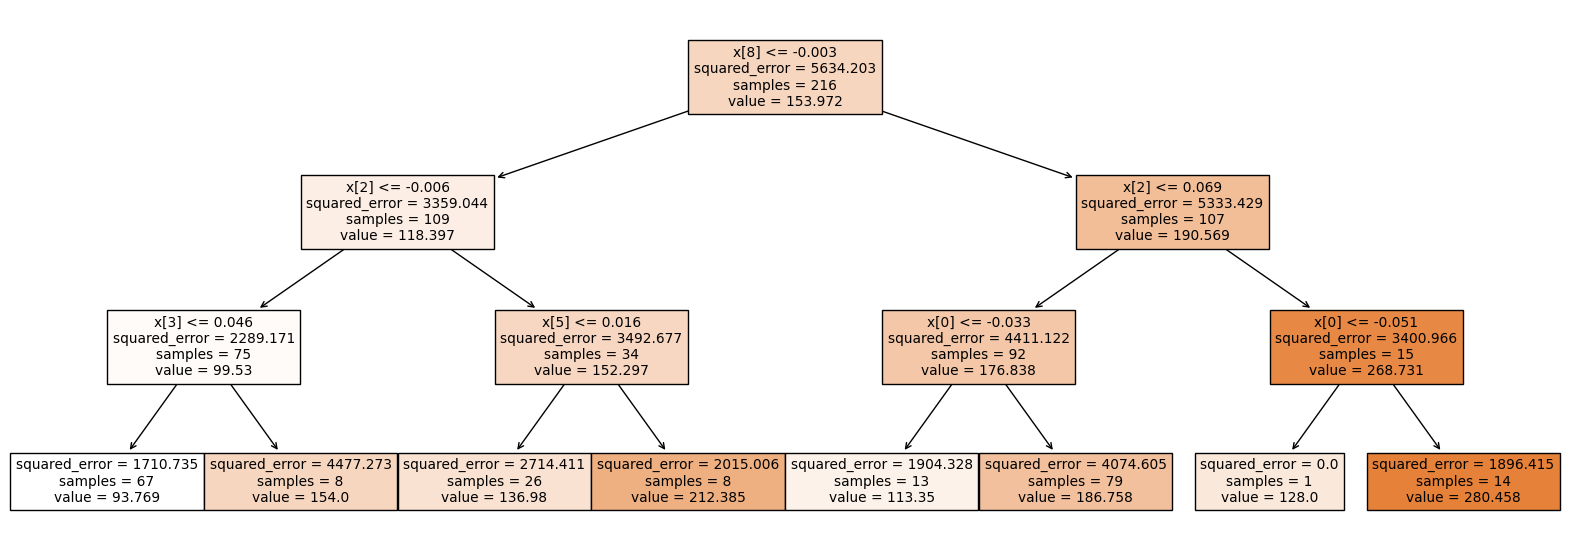

In [11]:
from sklearn.tree import plot_tree

#Veo uno de los arbolitos del random forest. Si cambio el indice entonces vere otro arbol
plt.figure(figsize=(20, 7))
plot_tree(regr.estimators_[1], filled=True)
plt.show()